In [81]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from random import randint

import pandas as pd
import csv

Načtení dat.

In [2]:
with open('chembl_dopamin_d2_rp_ki.csv', "r") as f:
    reader = csv.DictReader(f, delimiter=";")
    ligands = [Chem.MolFromSmiles(m["Smiles"]) for m in reader]

supplier = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in supplier if m!=None]

print(supplier[0].GetPropNames())
print(len(ligands))
print(len(drugbank))

RDKit ERROR: [12:11:01] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:11:01] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [12:11:02] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [12:11:02] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [12:11:01] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:11:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:11:02] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:11:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:11:02] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [12:11:02] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [12:11:02] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [12:11:02] Can't kek

10473
7113


RDKit ERROR: [12:11:04] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [12:11:04] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:11:04] ERROR: Could not sanitize molecule ending on line 1151592


Zkoušení SMARTSů

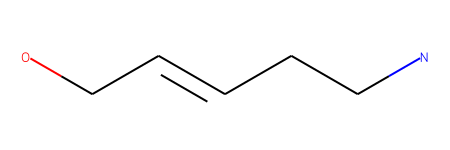

In [3]:
structure = Chem.MolFromSmarts("O-C-C=C-C-C-N")
structure

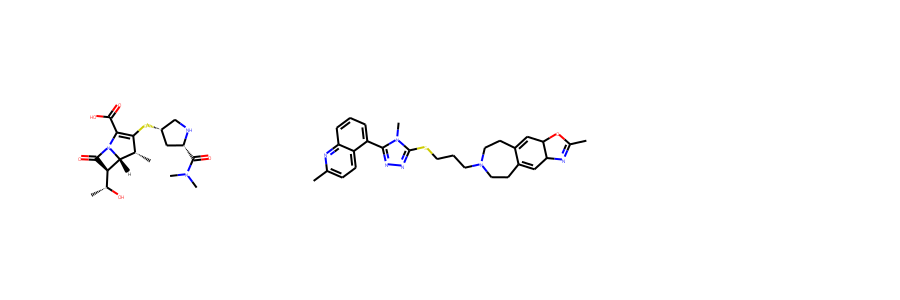

In [4]:
structure_containing_lignds = [l for l in ligands if l.HasSubstructMatch(structure)]
#dopamine_conteining_lignds
Draw.MolsToGridImage(structure_containing_lignds, molsPerRow=3, subImgSize=(300,300))

hledání aminokyselin, nejdříve zkouška na histidinu (+ vizualizace)

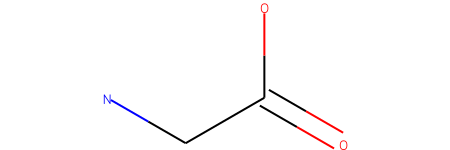

In [5]:
amk = Chem.MolFromSmarts("C(-N)-C(=[OX1])-[O;h1]")
amk

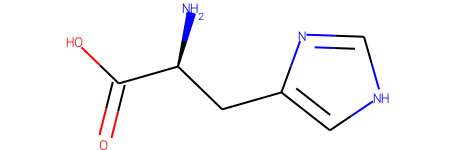

In [6]:
histidine = Chem.MolFromSmiles("N[C@@H](Cc1c[nH]cn1)C(=O)O")
histidine

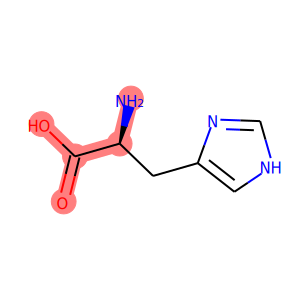

In [7]:
#list stejnych atomu a vazeb
atoms_matched = list(histidine.GetSubstructMatch(amk))
bonds_matched = []
#pro kazdou vazbu z patternu
for bond in amk.GetBonds():
    first = atoms_matched[bond.GetBeginAtomIdx()]
    second = atoms_matched[bond.GetEndAtomIdx()]
    #ji podle incidentnich atomu pridej do listu matchnutych vazeb
    bonds_matched.append(histidine.GetBondBetweenAtoms(first,second).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d, histidine, highlightAtoms = atoms_matched, highlightBonds = bonds_matched)#
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

In [8]:
looks_like_aa = [l for l in ligands if l.HasSubstructMatch(amk)]
len(looks_like_aa)

71

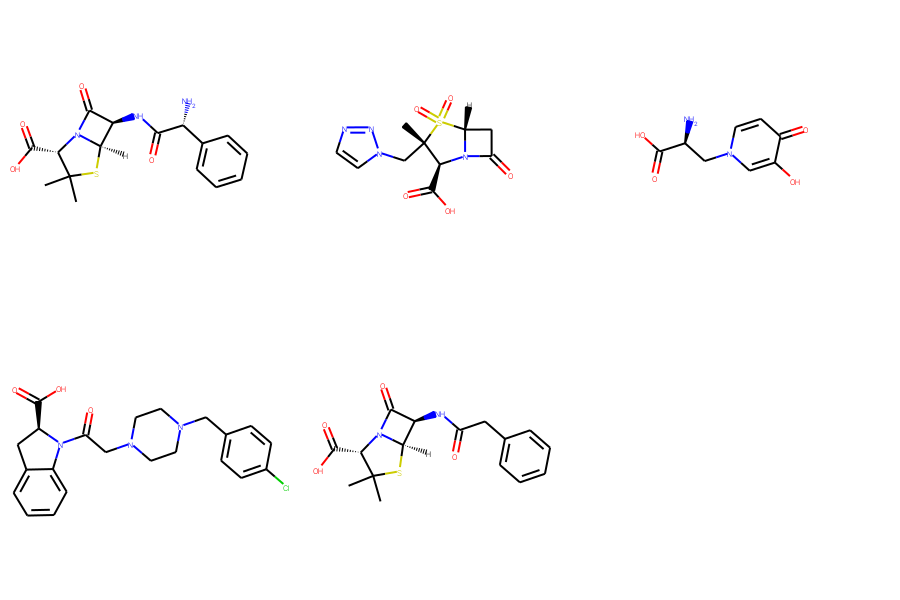

In [9]:
#krotim vypis, je jich dost
Draw.MolsToGridImage(looks_like_aa[1:6], molsPerRow=3, subImgSize=(300,300))

In [10]:
looks_like_aa = [l for l in drugbank if l.HasSubstructMatch(amk)]
len(looks_like_aa)

680

In [11]:
amk_number_d2 = [len(l.GetSubstructMatches(amk)) for l in ligands if len(l.GetSubstructMatches(amk)) != 0 ]
print("celkovy pocet ligandu: " + str(len(ligands)))
print("pocet ligandu s amk: " + str(len(amk_number_d2)))
print("prumerny pocet amk na jednom ligandu:" + str(sum(amk_number_d2)/len(amk_number_d2)))
max(amk_number_d2)

celkovy pocet ligandu: 10473
pocet ligandu s amk: 71
prumerny pocet amk na jednom ligandu:1.3661971830985915


4

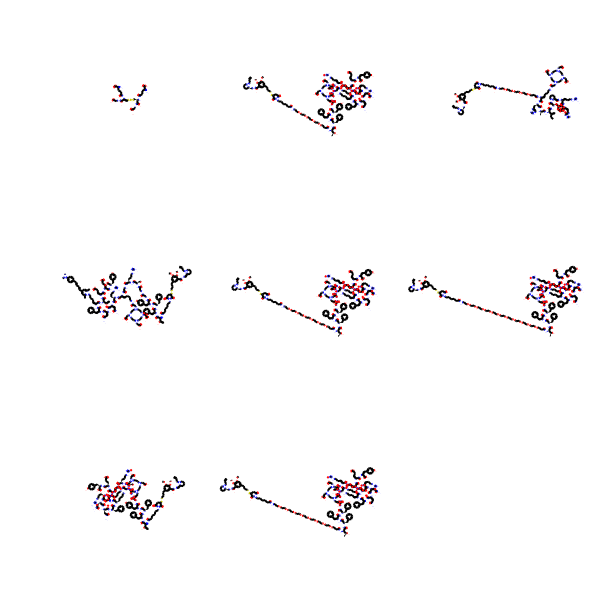

In [12]:
#vykresleni molekul se 4 amk
amk_number_d2 = [d for d in ligands if len(d.GetSubstructMatches(amk)) == 4 ]
Draw.MolsToGridImage(amk_number_d2)

In [13]:
amk_number_db = [len(d.GetSubstructMatches(amk)) for d in drugbank if len(d.GetSubstructMatches(amk)) != 0]
print("celkovy pocet ligandu: " + str(len(drugbank)))
print("pocet ligandu s amk: " + str(len(amk_number_db)))
print("prumerny pocet amk na jednom ligandu:" + str(sum(amk_number_db)/len(amk_number_db)))
max(amk_number_db)

celkovy pocet ligandu: 7113
pocet ligandu s amk: 680
prumerny pocet amk na jednom ligandu:1.1205882352941177


4

Drugbank je na aminokyseliny bohatší než můj dopaminový dataset (o řád). Počet skupin na ligandu je vyšší u d2d datasetu. Maximální počet struktur na jednom ligandu jsou čtyři (d2d je takových rekordmanů více). 

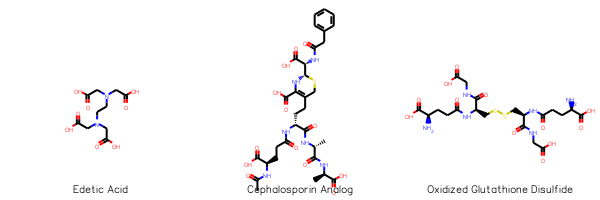

In [14]:
amk_number_db = [d for d in drugbank if len(d.GetSubstructMatches(amk)) == 4]
Draw.MolsToGridImage(amk_number_db, legends=[d.GetProp("GENERIC_NAME") for d in amk_number_db])

Hledání levodopy a jí podobných molekul - jen proto, že vím, že tam někde bude...

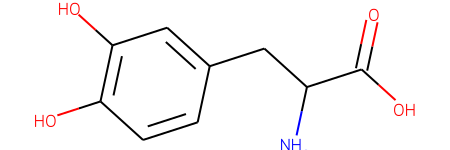

In [15]:
levodopa = Chem.MolFromSmiles("C1=CC(=C(C=C1CC(C(=O)O)N)O)O")
levodopa

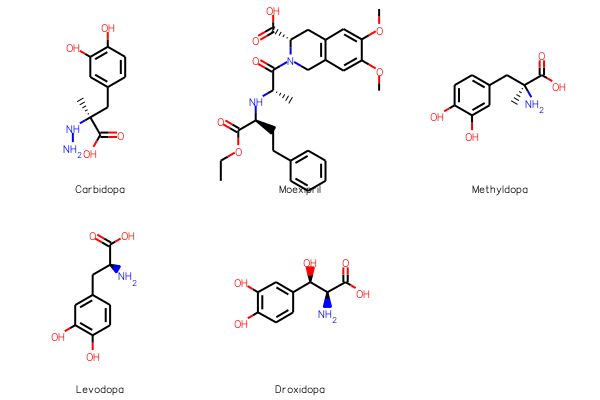

In [16]:
looks_like_levodopa = [l for l in drugbank if l.HasSubstructMatch(levodopa)]
Draw.MolsToGridImage(looks_like_levodopa, molsPerRow=3, legends=[l.GetProp("GENERIC_NAME") for l in looks_like_levodopa])

In [17]:
from itertools import chain
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t')
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")])

In [68]:
#otocit to
df_ligands = pd.DataFrame(columns=["ligand", "pain_assoc", "pain_str"])
for l in ligands:
    for p in pains:
        if l.HasSubstructMatch(p[0]):
            x = {"ligand": l, "pain_assoc": p[0], "pain_str": p[1]}
            df_ligands = df_ligands.append(x, ignore_index=True)
df_ligands

,ligand,pain_assoc,pain_str
0,<rdkit.Chem.rdchem.Mol object at 0x7f39bf98dcb0>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b4080>,anil_di_alk_C(246)
1,<rdkit.Chem.rdchem.Mol object at 0x7f39bf991710>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b4080>,anil_di_alk_C(246)
2,<rdkit.Chem.rdchem.Mol object at 0x7f39bf992490>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b4080>,anil_di_alk_C(246)
3,<rdkit.Chem.rdchem.Mol object at 0x7f39bf995760>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b4080>,anil_di_alk_C(246)
4,<rdkit.Chem.rdchem.Mol object at 0x7f39bf996490>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf322490>,styrene_A(13)
...,...,...,...
109,<rdkit.Chem.rdchem.Mol object at 0x7f39bf85f760>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b2d50>,azo_A(324)
110,<rdkit.Chem.rdchem.Mol object at 0x7f39bf863d00>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b4080>,anil_di_alk_C(246)
111,<rdkit.Chem.rdchem.Mol object at 0x7f39bf862c60>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b4080>,anil_di_alk_C(246)
112,<rdkit.Chem.rdchem.Mol object at 0x7f39bf867710>,<rdkit.Chem.rdchem.Mol object at 0x7f39bf2b4080>,anil_di_alk_C(246)


In [92]:
print("pocet ligandu obsahujicich pains: " + str(len(df_ligands)))
print("procento pains obsahujicich ligandu v datasetu: " + str(len(df_ligands)/len(ligands)))
df_ligands["pain_str"].value_counts()

Pocet ligandu obsahujicich pains: 114
procento pains obsahujicich ligandu v datasetu: 0.010885133199656259


anil_di_alk_C(246)      65
azo_A(324)              25
quinone_A(370)           9
styrene_A(13)            6
anil_di_alk_B(251)       3
styrene_B(8)             2
keto_keto_beta_B(12)     2
steroid_A(2)             1
ne_rhod_A(235)           1
Name: pain_str, dtype: int64

Pokud jde o vyřazování, to procento bych vyřadila, dataset mám obrovský.

Jaké všechny PAINS struktury jsou mezi ligandy dopaminového d2 receptoru? - je jich 9 typů

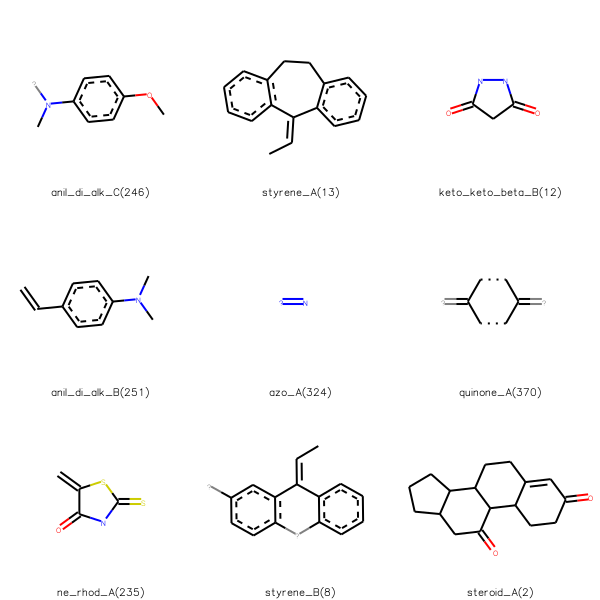

In [77]:
Draw.MolsToGridImage(df_ligands["pain_assoc"].unique().tolist(), molsPerRow=3, legends=df_ligands["pain_str"].unique().tolist())

Hledání pains v náhodném ligandu.

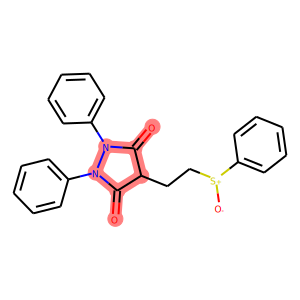

keto_keto_beta_B(12)


In [88]:
i = randint(0, len(df_ligands)-1)
ligand = df_ligands["ligand"][i]
pain = df_ligands["pain_assoc"][i]
atoms_matched = list(ligand.GetSubstructMatch(pain)) #histidine.GetSubstructMatch(amk)
bonds_matched = []

for bond in pain.GetBonds():
    first = atoms_matched[bond.GetBeginAtomIdx()]
    second = atoms_matched[bond.GetEndAtomIdx()]
    bonds_matched.append(ligand.GetBondBetweenAtoms(first,second).GetIdx())
    
d = rdMolDraw2D.MolDraw2DSVG(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d, ligand, highlightAtoms = atoms_matched, highlightBonds = bonds_matched)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))
print(df_ligands["pain_str"][i])